In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from wordcloud import WordCloud
import os

# Configurações adicionais (se necessário)
sns.set(style="whitegrid")
%matplotlib inline

# Leitura e Modelagem do CSV

In [7]:
csv_filename = "dados_posts.csv"

if not os.path.exists(csv_filename):
    print(f"Arquivo '{csv_filename}' não encontrado.")

try:
    df = pd.read_csv(csv_filename)
    print(f"Arquivo '{csv_filename}' carregado com sucesso!")
except Exception as e:
    print(f"Erro ao ler o arquivo CSV: {e}")

colunas_necessarias = ['data_hora', 'total', 'comentarios', 'likes', 'compartilhamentos',
                        'repostagens', 'tokens', 'texto_original', 'author_displayName', 'author_handle']
for col in colunas_necessarias:
    if col not in df.columns:
        print(f"A coluna '{col}' não foi encontrada no CSV. Verifique o arquivo.")

print(f"Total de posts encontrados: {len(df)}")

Arquivo 'dados_posts.csv' carregado com sucesso!
Total de posts encontrados: 256


# Evolução temporal de engajamento

### Evolução Temporal de Engajamento


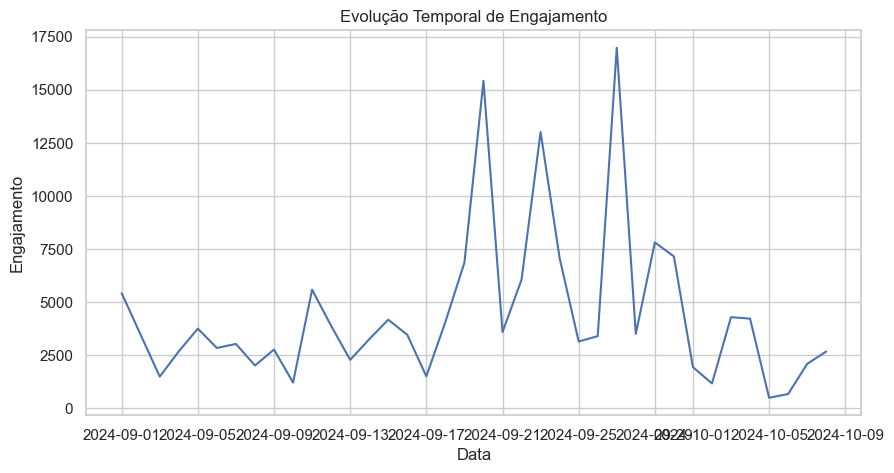

In [8]:
print("### Evolução Temporal de Engajamento")
df['data_hora'] = pd.to_datetime(df['data_hora'])
temporal_data = df.groupby(df['data_hora'].dt.date)['total'].sum()
temporal_data.plot(title="Evolução Temporal de Engajamento", figsize=(10,5))
plt.xlabel("Data")
plt.ylabel("Engajamento")
plt.show()

# Wordcloud

In [9]:
def generate_wordcloud(tokens_list):
    """
    Gera e exibe uma WordCloud a partir de uma lista de listas de tokens.
    """
    # Junta todos os tokens em uma string única
    all_tokens = ' '.join([' '.join(tokens) for tokens in tokens_list])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_tokens)
    
    # Exibe o WordCloud
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title("WordCloud das Palavras Mais Frequentes", fontsize=16)
    plt.show()

# Distribuição dos Valores


### Distribuição dos Valores


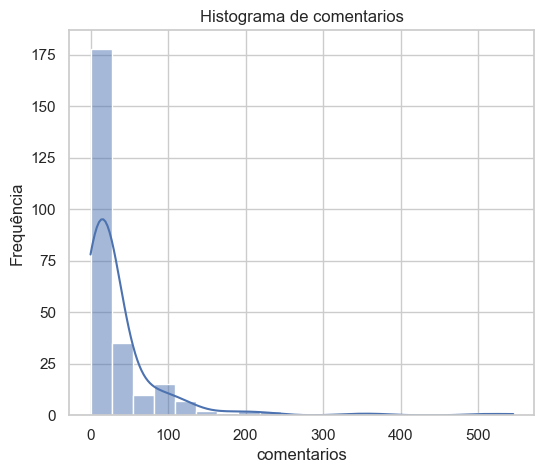

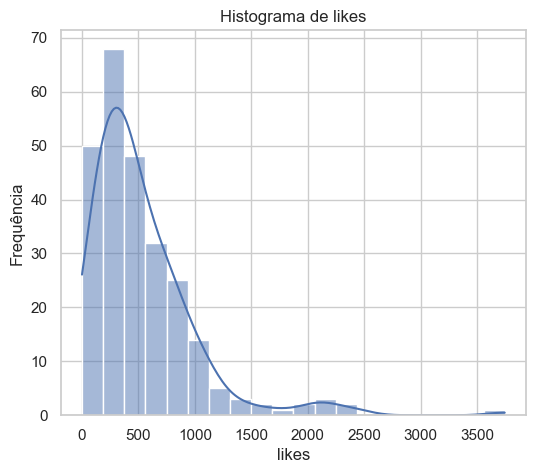

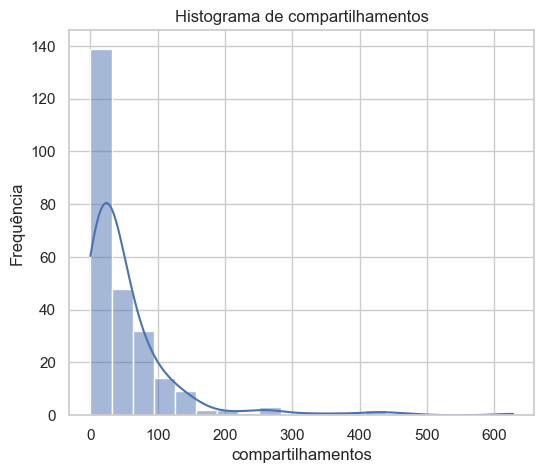

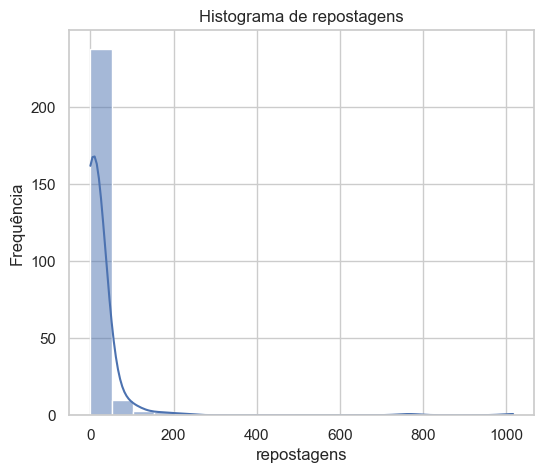

In [10]:
def distribution_values(df):
    """
    Exibe histogramas com distribuição dos valores das colunas numéricas.
    """
    numeric_columns = ['comentarios', 'likes', 'compartilhamentos', 'repostagens']
    
    for column in numeric_columns:
        fig, ax = plt.subplots(figsize=(6, 5))
        sns.histplot(df[column], bins=20, kde=True, ax=ax)
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequência')
        plt.show()


# Distribuição dos valores (comentários, likes, compartilhamentos, repostagens)
print("### Distribuição dos Valores")
distribution_values(df)


# Correlação Entre os Atributos

### Correlação Entre os Atributos
### Matriz de Correlação
                   comentarios     likes  compartilhamentos  repostagens  \
comentarios           1.000000  0.529210           0.431732     0.773761   
likes                 0.529210  1.000000           0.884635     0.580997   
compartilhamentos     0.431732  0.884635           1.000000     0.436081   
repostagens           0.773761  0.580997           0.436081     1.000000   
total                 0.650718  0.984374           0.883533     0.696302   

                      total  
comentarios        0.650718  
likes              0.984374  
compartilhamentos  0.883533  
repostagens        0.696302  
total              1.000000  


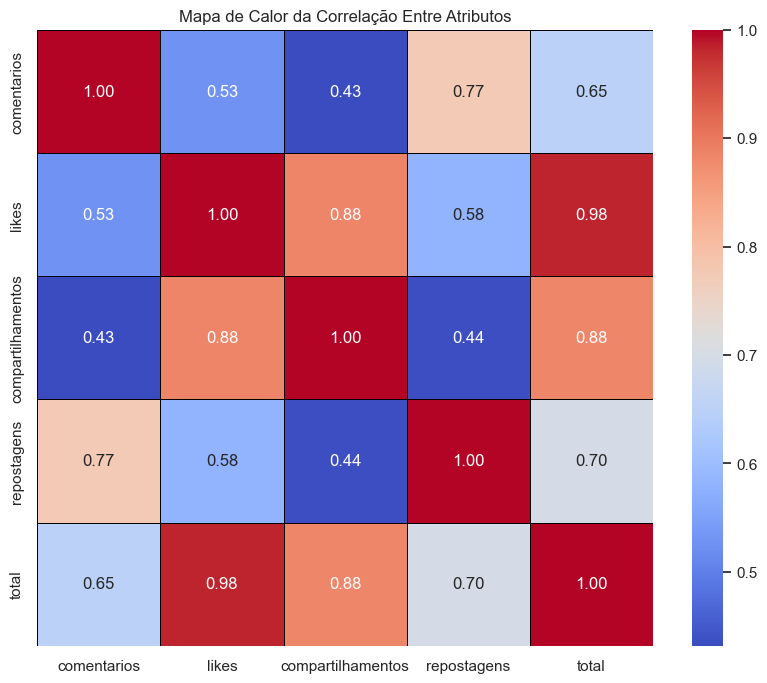

In [11]:
def analyze_correlation(df):
    """
    Calcula e exibe a matriz de correlação e o mapa de calor dos atributos numéricos.
    """
    numeric_columns = ['comentarios', 'likes', 'compartilhamentos', 'repostagens', 'total']
    matriz_correlacao = df[numeric_columns].corr()

    print("### Matriz de Correlação")
    print(matriz_correlacao)

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
                linewidths=0.5, linecolor='black', ax=ax)
    ax.set_title('Mapa de Calor da Correlação Entre Atributos')
    plt.show()

# Análise de correlação entre os atributos
print("### Correlação Entre os Atributos")
analyze_correlation(df)

## Identificar tokens mais repetidos

In [12]:
def get_top_tokens(df, top_n=10):
    """
    Retorna um DataFrame com os tokens que mais contribuíram para o engajamento.
    """
    token_engagement = {}
    # Para cada post, acumula o total de engajamento para cada token encontrado
    for _, row in df.iterrows():
        # Aqui assumimos que a coluna 'tokens' é armazenada no CSV como uma string que representa uma lista;
        # se for o caso, você pode converter usando eval() ou ast.literal_eval()
        tokens = row['tokens']
        # Se os tokens estiverem armazenados como string no formato "['token1', 'token2']",
        # utilize:
        if isinstance(tokens, str):
            try:
                import ast
                tokens = ast.literal_eval(tokens)
            except Exception as e:
                print(f"Erro ao converter tokens: {e}")
                tokens = []
        for token in tokens:
            token_engagement[token] = token_engagement.get(token, 0) + row['total']
    return pd.DataFrame(list(token_engagement.items()), columns=['Token', 'Engajamento']) \
             .sort_values(by='Engajamento', ascending=False).head(top_n)

## Previsão com ARIMA

## Previsão de Engajamento com ARIMA
### Série Temporal Diária de Engajamento


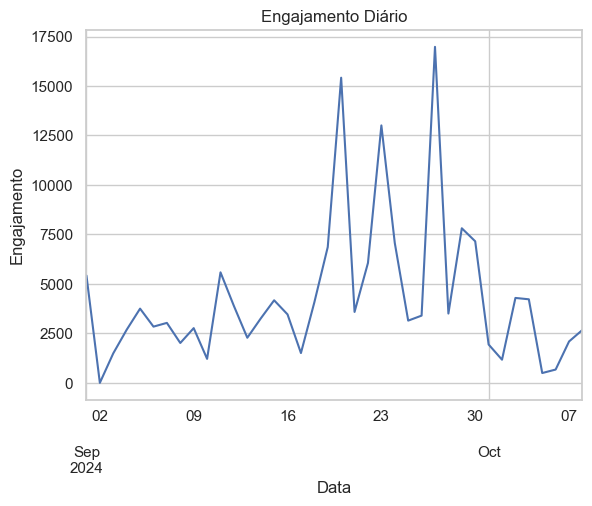

### Previsão para os Próximos Dias


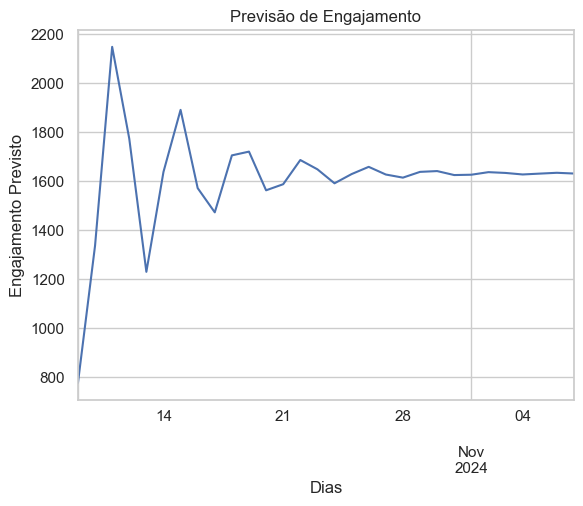

                        Data  predicted_mean
0  2024-10-09 00:00:00+00:00      776.158105
1  2024-10-10 00:00:00+00:00     1336.739957
2  2024-10-11 00:00:00+00:00     2148.780153
3  2024-10-12 00:00:00+00:00     1773.689358
4  2024-10-13 00:00:00+00:00     1229.740012
5  2024-10-14 00:00:00+00:00     1637.851779
6  2024-10-15 00:00:00+00:00     1891.343414
7  2024-10-16 00:00:00+00:00     1571.674912
8  2024-10-17 00:00:00+00:00     1472.702437
9  2024-10-18 00:00:00+00:00     1705.430496
10 2024-10-19 00:00:00+00:00     1720.773389
11 2024-10-20 00:00:00+00:00     1562.751198
12 2024-10-21 00:00:00+00:00     1587.645779
13 2024-10-22 00:00:00+00:00     1686.468624
14 2024-10-23 00:00:00+00:00     1648.534799
15 2024-10-24 00:00:00+00:00     1591.362400
16 2024-10-25 00:00:00+00:00     1629.013320
17 2024-10-26 00:00:00+00:00     1658.586127
18 2024-10-27 00:00:00+00:00     1627.209188
19 2024-10-28 00:00:00+00:00     1614.505758
20 2024-10-29 00:00:00+00:00     1638.046704
21 2024-10

In [13]:
def train_arima(df, forecast_days):
    """
    Ajusta um modelo ARIMA para prever o engajamento e exibe os gráficos da série histórica e da previsão.
    """
    print("## Previsão de Engajamento com ARIMA")
    # Converte a coluna data_hora e ordena os dados
    df['data_hora'] = pd.to_datetime(df['data_hora'])
    df = df.sort_values('data_hora')
    
    # Agrega o engajamento diário (ajustável para outra granularidade, se necessário)
    df_daily = df.set_index('data_hora').resample('D')['total'].sum().fillna(0)
    
    print("### Série Temporal Diária de Engajamento")
    df_daily.plot(title="Engajamento Diário")
    plt.xlabel("Data")
    plt.ylabel("Engajamento")
    plt.show()
    
    # Define e treina o modelo ARIMA (a ordem pode ser ajustada conforme os dados)
    try:
        model = ARIMA(df_daily, order=(5, 1, 0))
        model_fit = model.fit()
    except Exception as e:
        print(f"Erro ao ajustar o modelo ARIMA: {e}")
        return
    
    # Realiza a previsão para os próximos 'forecast_days' dias
    forecast = model_fit.forecast(steps=forecast_days)
    
    print("### Previsão para os Próximos Dias")
    forecast.plot(title="Previsão de Engajamento")
    plt.xlabel("Dias")
    plt.ylabel("Engajamento Previsto")
    plt.show()
    
    # Exibe os resultados numéricos da previsão
    forecast_df = forecast.reset_index().rename(columns={'index': 'Data', 0: 'Engajamento Previsto'})
    print(forecast_df)

# Previsão de engajamento utilizando ARIMA
forecast_days = 30
train_arima(df, forecast_days)


## Análise de Características dos Posts

In [14]:
def analyze_post_features(df):
    """
    Analisa a relação entre características dos posts (como número de caracteres e hora de postagem) e o engajamento.
    """
    print("## Análise de Características dos Posts Relacionadas ao Engajamento")
    
    # 1. Quantidade de caracteres
    df['num_caracteres'] = df['texto_original'].apply(len)
    print("### Relação entre Quantidade de Caracteres e Engajamento")
    fig, ax = plt.subplots()
    sns.scatterplot(x='num_caracteres', y='total', data=df, ax=ax)
    ax.set_title("Engajamento vs. Número de Caracteres")
    plt.xlabel("Número de Caracteres")
    plt.ylabel("Engajamento")
    plt.show()
    
    # Exibe correlação entre número de caracteres e engajamento
    corr_chars = df[['num_caracteres', 'total']].corr().iloc[0, 1]
    print(f"Correlação entre número de caracteres e engajamento: {corr_chars:.2f}")
    
    # 2. Horário de Postagem
    df['hora'] = pd.to_datetime(df['data_hora']).dt.hour
    print("### Engajamento Médio por Hora de Postagem")
    eng_por_hora = df.groupby('hora')['total'].mean().reset_index()
    fig2, ax2 = plt.subplots()
    sns.lineplot(x='hora', y='total', data=eng_por_hora, marker='o', ax=ax2)
    ax2.set_title("Engajamento Médio por Hora")
    ax2.set_xlabel("Hora do Dia")
    ax2.set_ylabel("Engajamento Médio")
    plt.show()
    
    # 3. Tokens com Maior Engajamento
    print("### Tokens com Maior Acúmulo de Engajamento")
    top_tokens = get_top_tokens(df)
    print(top_tokens)

## Identificação de padrões

### Tokens com Mais Engajamento
                   Token  Engajamento
0               cruzeiro        87060
39                 vamos        28841
157                 azul        28789
183                 jogo        26830
531        labestianegra        25825
156                nação        22377
294                    h        19043
152               contra        18167
205  soucruzeirotradição        17563
48               técnico        17439
### Posts com Maior Engajamento

Cruzeiro 🦊 (@cruzeiro.com.br) - Engajamento: 5685
Texto Original: Fernando Diniz é o novo treinador do Cruzeiro!
Atual campeão da Copa Libertadores, da Recopa Sul-Americana e com passagem recente pela Seleção Brasileira, o técnico inicia sua trajetória no clube estrelado nesta terça-feira (24), quando já comandará os treinamentos da equipe.

Cruzeiro 🦊 (@cruzeiro.com.br) - Engajamento: 3980
Texto Original: O Cruzeiro comunica a saída de Fernando Seabra do comando técnico da equipe. Além do treinador, o auxiliar 

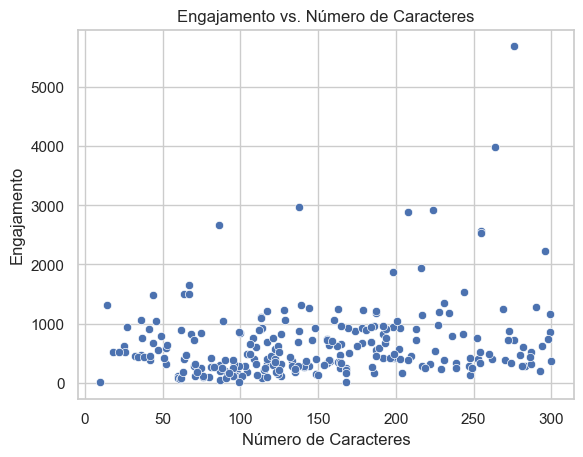

Correlação entre número de caracteres e engajamento: 0.24
### Engajamento Médio por Hora de Postagem


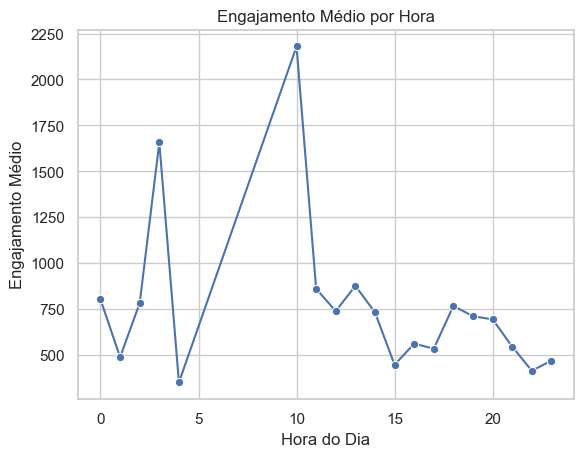

### Tokens com Maior Acúmulo de Engajamento
                   Token  Engajamento
0               cruzeiro        87060
39                 vamos        28841
157                 azul        28789
183                 jogo        26830
531        labestianegra        25825
156                nação        22377
294                    h        19043
152               contra        18167
205  soucruzeirotradição        17563
48               técnico        17439


In [15]:
# Exibe os tokens com maior engajamento
print("### Tokens com Mais Engajamento")
top_tokens = get_top_tokens(df)
print(top_tokens)

# Exibe os posts de maior engajamento
print("### Posts com Maior Engajamento")
top_posts = df.sort_values(by='total', ascending=False).head(5)
for _, row in top_posts.iterrows():
    print(f"\n{row['author_displayName']} (@{row['author_handle']}) - Engajamento: {row['total']}")
    print(f"Texto Original: {row['texto_original']}")
    # Se houver imagens, exibe a URL (se a estrutura do JSON na coluna 'record' estiver presente)
    record = row.get("record")
    if isinstance(record, str):
        try:
            import ast
            record = ast.literal_eval(record)
        except Exception:
            record = {}
    if isinstance(record, dict):
        embed = record.get("embed", {})
        if embed.get("$type") == "app.bsky.embed.images#view":
            images = embed.get("images", [])
            for image in images:
                image_url = image.get("fullsize", "")
                if image_url:
                    print(f"Imagem do Post: {image_url}")

# Análise das características dos posts
analyze_post_features(df)